# Investigate the student performance by applying "multiple linear regression"

![image](https://wallpapercave.com/wp/wp13084836.jpg)

### Dataset ⏬⏬⏬
Download the dataset via the [link](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression) here!

### Case Scenario 🤖
Assume you are a teacher, and you realize that the performance index of some students has dropped recently, so you want to figure out the reason for affecting the performance index. You have collected 10,000 student records, each containing information about various predictors and a performance index. Finally, you will perform multiple linear regression to find the association between predictors and a performance index.

### Key Findings 💡
1.

### Suggestion 🪄
1.


# Import Library

In [4]:
import pandas as pd

# Import Dataset

In [6]:
# URL file 
url = "https://raw.githubusercontent.com/marcus-0413/Linear-Regression/refs/heads/main/Student_Performance.csv"

# Read file from github 
df = pd.read_csv(url) 

# Check out the dataset 
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [7]:
# Create dictionary for variable explanation 
df2 = { 
    'Variables' : ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
    'Explanation': ['The total number of hours spent studying by each student', 'The scores obtained by students in previous tests', 'Whether the student participates in extracurricular activities (Yes or No)', 'The average number of hours of sleep the student had per day', 'The number of sample question papers the student practiced', "A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance"]
}

# Convert to dataframe 
df2 = pd.DataFrame(df2)

## Option 1
# Set pandas to display the full column content
# pd.set_option('display.max_colwidth', None)

# Check out the dataframe 
#df2

## Option 2
# Manually print the content aligned to the left
for i, explanation in enumerate(df2['Explanation']):
    print(f"Variable: {df2['Variables'][i]}")
    print(f"Explanation: {explanation.ljust(50)}\n")

Variable: Hours Studied
Explanation: The total number of hours spent studying by each student

Variable: Previous Scores
Explanation: The scores obtained by students in previous tests 

Variable: Extracurricular Activities
Explanation: Whether the student participates in extracurricular activities (Yes or No)

Variable: Sleep Hours
Explanation: The average number of hours of sleep the student had per day

Variable: Sample Question Papers Practiced
Explanation: The number of sample question papers the student practiced

Variable: Performance Index
Explanation: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance



# Data Preparation 

In [9]:
# Check null value
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

# Data Understanding

In [11]:
# Check row and column number of dataframe 
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 10000
Number of columns: 6


In [12]:
# Calculate statistic metric 
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


### Explanation
1. **Hours studied:** Most of the hours studied lie between `4.99-2.59` and `4.99+2.59`, or approximately between `2.4` and `7.58`. The least hours studied is `1 hour`, whereas, the most studied is `9 hours`.
   
2. **Previous Scores:** Most of the previous scores lie between `9.45-17.34` and `69.45+17.34`, or approximately between `52.11` and `86.79`. The lowest previous score is `40`, whereas, the highest previous score is `99`.
   
3. **Sleep Hours:** Most of the sleep hours lie between `6.53-1.7` and `6.53+1.7`, or approximately between `4.83` and `8.23`. The lowest sleep hours is `4 hour`, whereas, the highest sleep hours is `9 hours`.

4. **Sample Question Papers Practiced:** Most of the sample quetion papers practiced lie between `4.58-2.87` and `4.58+2.87`, or approximately between `1.71`and `7.45`. The least sample quetion papers practiced is `0`, whereas, the most sample quetion papers practiced is `9`.
   
5. **Performance Index:** Most of the performance index lie between `55.22-19.21` and `55.22+19.21`, or approximately between `36.01` and `74.43`. The least performance index is `10`, whereas, the highest performance index is `100`.

In [14]:
# Calculate the mode
print("Mode:")
df.mode().iloc[0]

Mode:


Hours Studied                          1
Previous Scores                       54
Extracurricular Activities            No
Sleep Hours                            8
Sample Question Papers Practiced       6
Performance Index                   67.0
Name: 0, dtype: object

In [15]:
pd.set_option('future.no_silent_downcasting', True)

# Convert column 'Extracurricular Activities' into Numeric
df['Extracurricular Activities'] = df['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})

df['Extracurricular Activities'].head()

0    1
1    0
2    1
3    1
4    0
Name: Extracurricular Activities, dtype: object

# Exploratory Data Analysis (EDA)

Figure 1. Scatter Plot - Predictors vs Performance Index


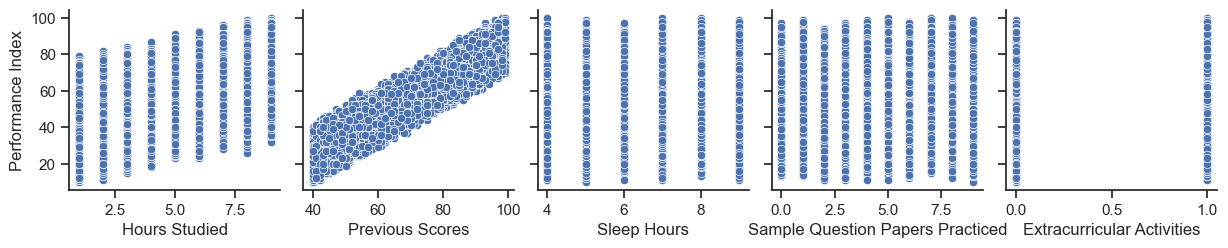

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")

# Create scatter plots for all predictors vs dependent variable
sns.pairplot(df, x_vars=['Hours Studied', 'Previous Scores','Sleep Hours', 'Sample Question Papers Practiced','Extracurricular Activities'], 
             y_vars='Performance Index', kind='scatter')
print('Figure 1. Scatter Plot - Predictors vs Performance Index')

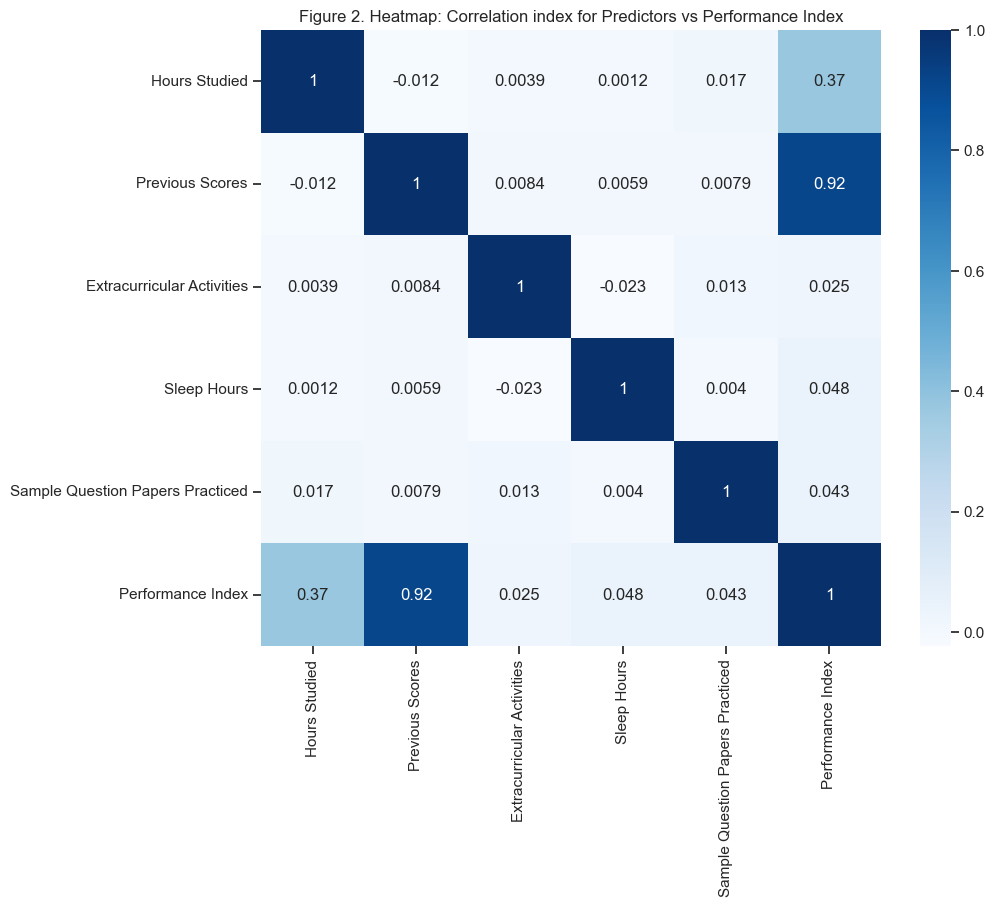

In [18]:
# Draw a heatmap with the numeric values in each cell
# Set the figure size (Width = 10, Height = 8)
plt.figure(figsize = (10,8))

# Generate the correlation heatmap
sns.heatmap(df.corr(), annot=True,cmap='Blues')

# Show the heatmap
plt.title('Figure 2. Heatmap: Correlation index for Predictors vs Performance Index')
plt.show()

### Explanation
1. Hours studied, and previous scores show a clear and positive relationship with performance index. So, these two predictors must be included in the model.
2. The scatter plot for hours studied indicates that the more hours studied, the higher the performance index obtained. Meanwhile, the scatter plot for previous scores indicates that the higher the previous scores obtained, the higher the performance index obtained.
3. The sleep hours and other two predictors do not significantly impact the performance index based on correlation index shown on heatmap.

## Check Outlier

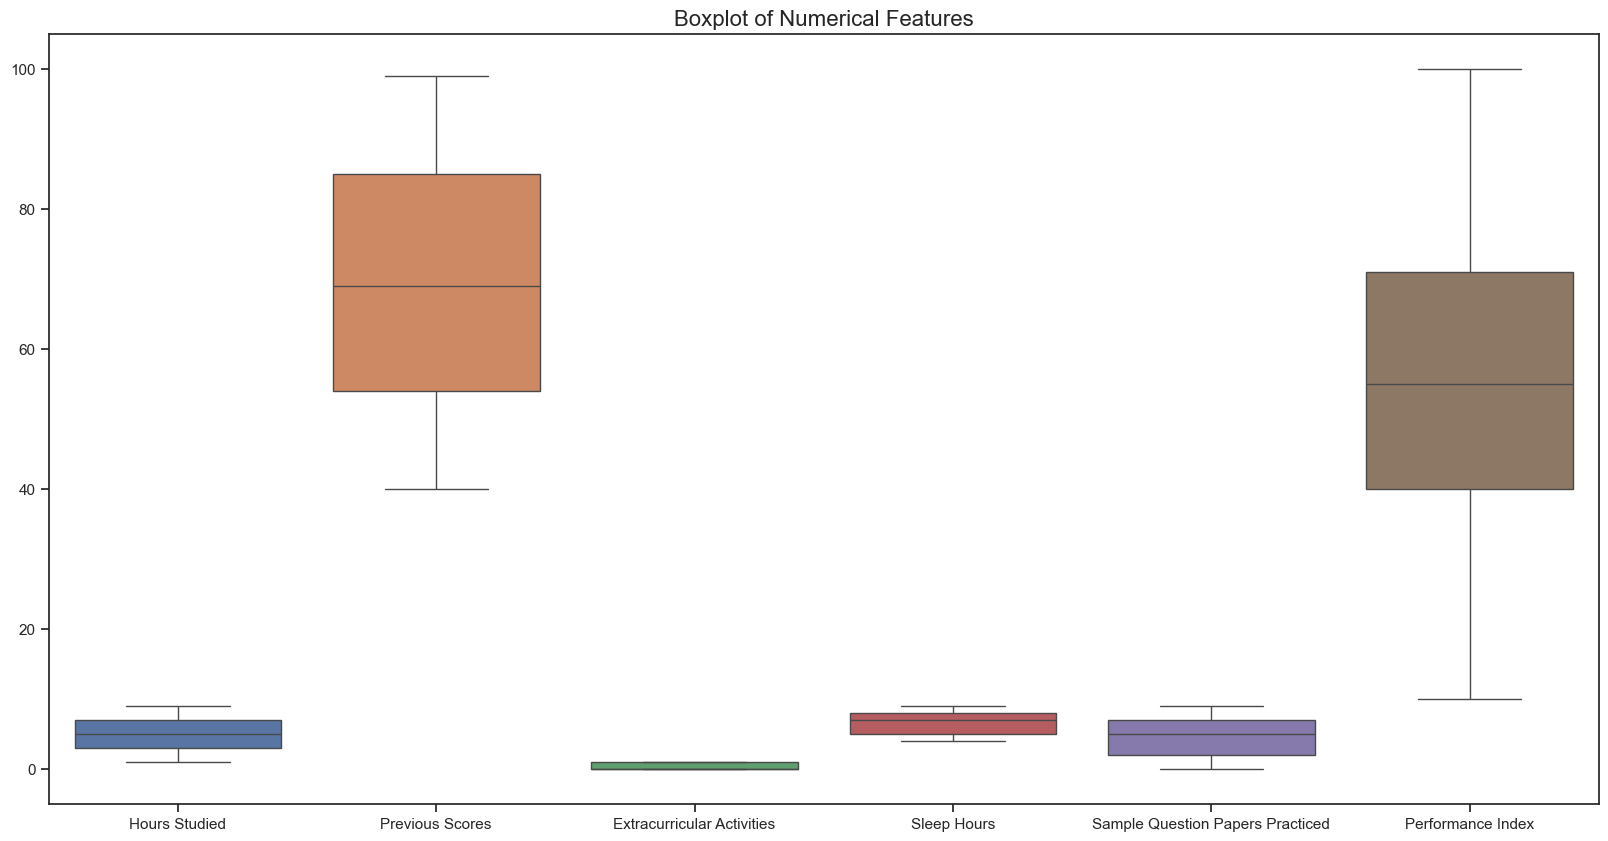

Remark: Not outlier found.


In [51]:
# Boxplot to detect outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Features', fontsize = 16)
plt.show()
print('Remark: Not outlier found.')

# Split data

In [136]:
from sklearn.model_selection import train_test_split
# Include hours studied and previous scores only
X = df.loc[:, ['Hours Studied', 'Previous Scores']]
y = df["Performance Index"]

# Split data into 80% training & 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building

In [97]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Model Evaluation

In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse}, MAE: {mae}")

RMSE: 2.2895242271160883, MAE: 1.8269025376295696


# Cross Validation (k-Folds)

In [103]:
from sklearn.model_selection import cross_val_score
rmse_cv = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))
print("Cross-validated RMSE:", np.mean(rmse_cv))

Cross-validated RMSE: 2.284038864501273


# Model Interpretation

In [105]:
import statsmodels.api as sm
X_train_with_constant = sm.add_constant(X_train)  # Adding a constant for intercept
ols_model = sm.OLS(y_train, X_train_with_constant).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 2.790e+05
Date:                Wed, 09 Oct 2024   Prob (F-statistic):               0.00
Time:                        10:58:06   Log-Likelihood:                -17953.
No. Observations:                8000   AIC:                         3.591e+04
Df Residuals:                    7997   BIC:                         3.593e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -29.6703      0.117   -2

### Equation of multiple linear regression model:  
#### y(Peformance Index) = -29.67 + 2.85(Hours Studied) -1.02(Previous Scores)

In [8]:
HS = int(input('Please enter number of hours studied: '))
PS = int(input('Please enter previous scores obtained: '))
PI = -round(float(-29.67) + (float(2.85)*(HS)) - (float(1.02)*(PS)))
print(f'Your estimated performance index will be {PI}, if you studied for {HS} hours and your previous scores is {PS}.')

Please enter number of hours studied:  5
Please enter previous scores obtained:  90


Your estimated performance index will be 107, if you studied for 5 hours and your previous scores is 90.


# Predicted vs. Actual Values Plot
This plot compares the model’s predictions to the actual values. It's useful for assessing how well the model performs.

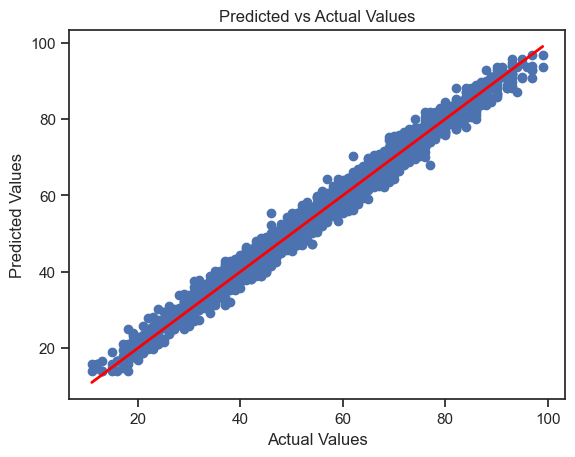

In [121]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [141]:
df3 = pd.DataFrame({ 'Actual': y_test, 'Predict': y_pred}) 
df3

,Actual,Predict
6252,51.0,54.819150
4684,20.0,22.845140
1731,46.0,47.309629
4742,28.0,30.208273
4521,41.0,44.257514
...,...,...
6412,45.0,47.262058
8285,66.0,62.134711
7853,16.0,16.740911
1095,65.0,63.346042


# Check Assumption (Residuals and Normality)

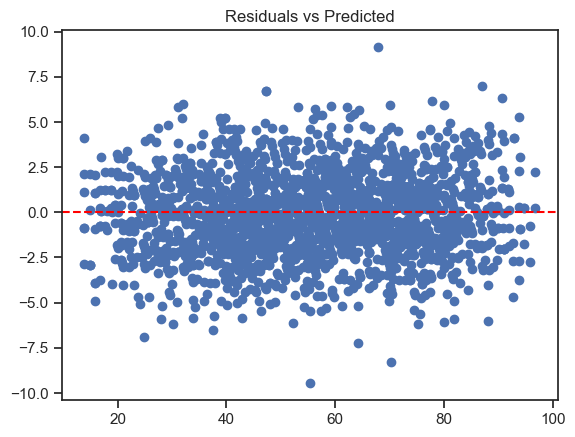

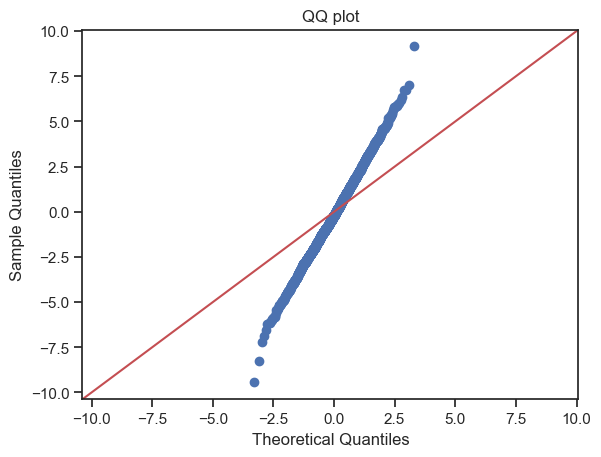

In [127]:
residuals = y_test - y_pred

# Residual plot
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.show()

# Q-Q plot
sm.qqplot(residuals, line='45')
plt.title('QQ plot')
plt.show()